# EDA on iris dataset

In [2]:
from sklearn import datasets

# Plotting packages
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# seaborn needs Pandas dataframes as input
import pandas as pd
# matplotlib needs numpy arrays
import numpy as np

#### Load iris data from scikit learn

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris['filename']

'C:\\Python37\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [7]:
type(iris['data'])

numpy.ndarray

In [8]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [9]:
columns = iris['feature_names']
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
features = iris['data']

In [11]:
type(features)

numpy.ndarray

In [12]:
target = iris['target']

In [27]:
type(target)

numpy.ndarray

#### Convert numpy arrays to Pandas dataframes

In [14]:
df = pd.DataFrame(features, columns = columns)

In [29]:
df['class'] = target
df['class'].replace({0:'Setosa',1:'Versicolour',2:'Virginica'},inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## 2d Pair plots

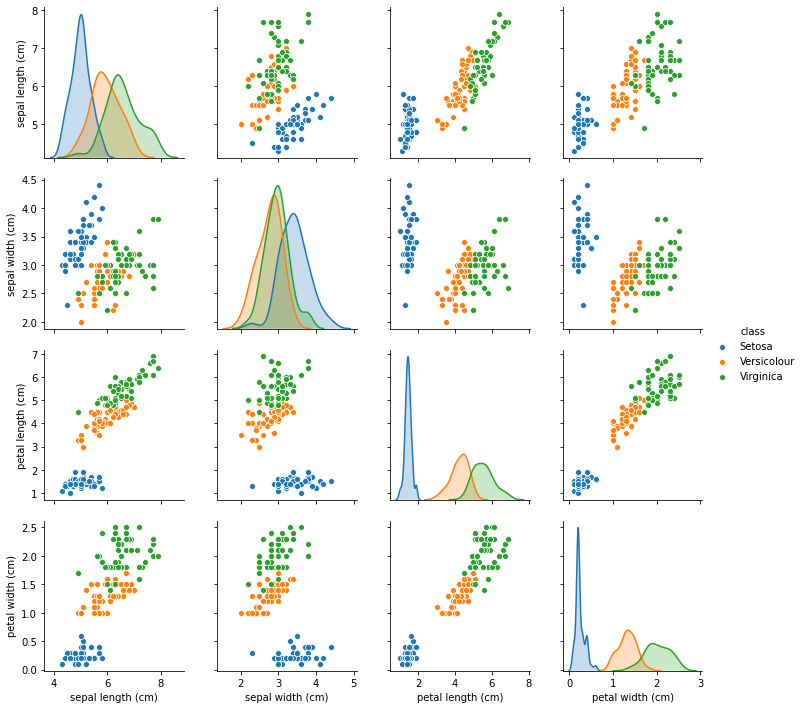

In [31]:
sns.pairplot(df,hue='class')

In [18]:
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
features.shape

(150, 4)

In [20]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

## 3d Plots

In [21]:
x=features[:,0]
y=features[:,2]
z=features[:,3]

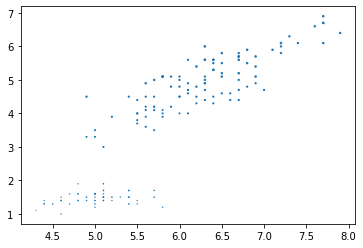

In [22]:
plt.scatter(x,y,z)

Some ideas from this [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

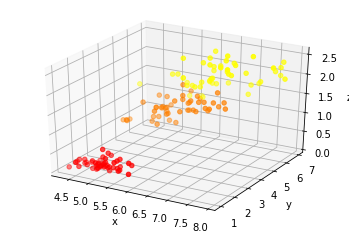

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=df.iloc[:,4],cmap='autumn');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

#### Petal length shows the greatest difference between different classes

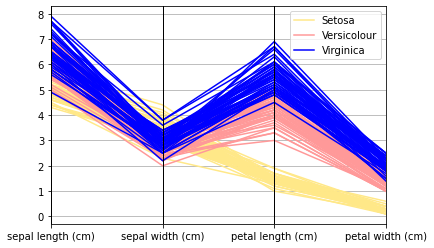

In [32]:
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(df, 'class', color=('#FFE888', '#FF9999','blue'))

#### Correlation Heat map

In [41]:
corr = df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


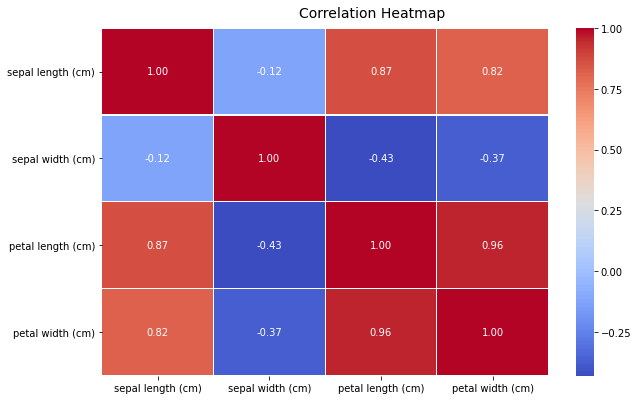

In [46]:
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(round(corr,2),annot=True,ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)